# EX. 4 OF DECISION MODELLING PROJECT
Note: all this code is taking into account only food.

In [44]:
import pandas as pd
import numpy as np

EN = "energy_points"
SU = "sugars_points"
FA = "saturated_fat_points"
SA = "sodium_points"
PR = "proteins_points"
FI = "fiber_points"
FR = "fruits&veg_points"

MIN_CRITERIAS = {EN, SU, FA, SA}
MAX_CRITERIAS = {PR, FI, FR}

NORMAL_SCORE = "normal_score"
NEO_SCORE = "neo_score"
NEI_SCORE = "nei_score"
NORMAL_LABEL = "normal_label"
NEO_LABEL = "neo_label"
NEI_LABEL = "nei_label"

## New scale transformation

In [45]:
def scale_transform(df):
    '''
    1. x'_i = 10 - x_i for the criteria to be minimized i ∈ {en, su, fa, sa}
    2. x'_i = 2 * x_i for the criteria to be maximized i ∈ {pr, fi, fr}
    '''
    for column in df.columns:
        if column in MIN_CRITERIAS:
            df[column] = 10 - df[column]
        elif column in MAX_CRITERIAS:
            df[column] = 2 * df[column]
    
    return df

## Models

In [46]:
def normal_model(df):
    # 40 − F(x) = 40 - F(x'_en, x'_su, x'_fa, x'_sa, x'_pr, x'_fi, x'_fr) = 40 - x'_en + x'_su + x'_fa + x'_sa + 1/2(x'_pr + x'_fi + x'fr)
    return (40 - (df[EN] + df[SU] + df[FA] + df[SA] + 1/2 * (df[PR] + df[FI] + df[FR]))).astype(int)

# 1. Build a python function returning a score Neo(x) associated to each food x of your database
#TODO see if you have to put 40- at the beginning
def neo(df):
    # Neo(x) = Neo(x'_su, x'_fa, x'_sa, x'_pr, x'_fi, x'_fr) = x'_su + x'_fa + x'_sa + 1/2(x'_pr + x'_fi + x'_fr)
    return (30 - (df[SU] + df[FA] + df[SA] + 1/2 * (df[PR] + df[FI] + df[FR]))).astype(int)

# 2. Build a python function returning a score Nei(x) associated to each food x of your database.
#TODO see if you have to put 40- at the beginning
def nei(df):
    # Nei(x'_en, x'_sa, x'_fr) = x'_en + x'_sa + 1/2 * x'_fr
    return (20 - (df[EN] + df[SA] + 1/2 * (df[FR]))).astype(int)

## Labels

In [47]:
# 3. Define and justify the new rules of the assignment of foods to the classes (labels A, ..., E)
def normal_labels(df):
    score = df[NORMAL_SCORE]
    return np.where(score<0, 'A',
    np.where(score<3, 'B',
    np.where(score<11, 'C',
    np.where(score<19, 'D',
    np.where(score<=40, 'E', "ERROR")))))

def neo_labels(df):
    score = df[NEO_SCORE]
    return np.where(score<-3, 'A',
    np.where(score<0, 'B',
    np.where(score<7, 'C',
    np.where(score<14, 'D',
    np.where(score<=30, 'E', "ERROR")))))

def nei_labels(df):
    score = df[NEI_SCORE]
    return np.where(score<2, 'A',
    np.where(score<4, 'B',
    np.where(score<8, 'C',
    np.where(score<12, 'D',
    np.where(score<=20, 'E', "ERROR")))))

In [48]:
# TODO 5. Don’t hesitate to give another additive model different to the two models given in the project.

In [49]:
df = pd.read_csv("../data/products.csv")
#filtering out drinks if any
df = df[df["is_beverage"] == 0]
# getting only the interesting columns
df = df.loc[:, ['id', 'name', 'brand', 'categories', 'energy_points', 'saturated_fat_points', 'sugars_points', 'sodium_points', 'fiber_points', \
    'proteins_points', 'fruits_vegetables_nuts_colza_walnut_olive_oils_points', 'grade', 'negative_points', 'positive_points', 'nutrition-score-fr']]

df.rename({'fruits_vegetables_nuts_colza_walnut_olive_oils_points': FR}, axis="columns", inplace=True)
df

,id,name,brand,categories,energy_points,saturated_fat_points,sugars_points,sodium_points,fiber_points,proteins_points,fruits&veg_points,grade,negative_points,positive_points,nutrition-score-fr
0,5400141127065,Macaroni,Boni,Macaroni de blé dur,4,0,0,0,3,5,0,a,4,8,-4
1,5411188134985,"Not Milk 3,5 %",Alpro,"Pflanzliche Lebensmittel und Getränke, Getränk...",0,0,0,0,1,0,0,a,0,1,-1
2,5411188135005,Not Milk Fettarm,Alpro,"Plant-based foods and beverages, Beverages, Pl...",0,0,0,0,1,0,0,a,0,1,-1
3,8003231013322,Gallette di mais biologiche,IN'S Mercato Bio,"Cibi e bevande a base vegetale, Cibi a base ve...",4,0,0,4,4,4,0,b,8,8,0
4,3258561400037,Baguette precuite,"Belle France,","Aliments et boissons à base de végétaux,Alimen...",3,0,0,6,1,4,0,c,9,5,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,3280220907137,Ma petite salade Laitue,Florette,"Aliments et boissons à base de végétaux, Alime...",0,0,0,0,1,0,5,a,0,6,-6
1996,3580282266037,Soupe Lentille corail au curry et lait de coco,Agidra,"Aliments et boissons à base de végétaux, Alime...",0,0,0,2,0,1,5,a,2,6,-4
1997,0077890122242,Italian classics marinated quartered artichokes,Wegmans,"Plant-based foods and beverages, Plant-based f...",1,1,0,7,0,0,0,c,9,0,9
1998,0681131281256,Ceylon cinnamon,Spring Valley,"Plant-based foods and beverages, en:plant-base...",0,0,0,0,0,0,0,b,0,0,0


## Check errors

In [50]:
negative_errors = df[df["negative_points"] != df[EN] + df[FA] + df[SU] + df[SA]]
assert len(negative_errors) == 0

In [51]:
positive_errors = df[df["positive_points"] != df[FI] + df[PR] + df[FR]]
assert len(positive_errors) == 0

## Scaling

In [52]:
df = scale_transform(df)

## Results

In [53]:
# compute scores
df[NORMAL_SCORE] = normal_model(df)
df[NEO_SCORE] = neo(df)
df[NEI_SCORE] = nei(df)

# associate labels
df[NORMAL_LABEL] = normal_labels(df)
df[NEO_LABEL] = neo_labels(df)
df[NEI_LABEL] = nei_labels(df)

df.head(100)

,id,name,brand,categories,energy_points,saturated_fat_points,sugars_points,sodium_points,fiber_points,proteins_points,...,grade,negative_points,positive_points,nutrition-score-fr,normal_score,neo_score,nei_score,normal_label,neo_label,nei_label
0,5400141127065,Macaroni,Boni,Macaroni de blé dur,6,10,10,10,6,10,...,a,4,8,-4,-4,-8,4,A,A,C
1,5411188134985,"Not Milk 3,5 %",Alpro,"Pflanzliche Lebensmittel und Getränke, Getränk...",10,10,10,10,2,0,...,a,0,1,-1,-1,-1,0,A,B,A
2,5411188135005,Not Milk Fettarm,Alpro,"Plant-based foods and beverages, Beverages, Pl...",10,10,10,10,2,0,...,a,0,1,-1,-1,-1,0,A,B,A
3,8003231013322,Gallette di mais biologiche,IN'S Mercato Bio,"Cibi e bevande a base vegetale, Cibi a base ve...",6,10,10,6,8,8,...,b,8,8,0,0,-4,8,B,A,D
4,3258561400037,Baguette precuite,"Belle France,","Aliments et boissons à base de végétaux,Alimen...",7,10,10,4,2,8,...,c,9,5,4,4,1,9,C,C,D
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,3760290870055,Pois chiche bio,Terres du Pays d'Othe,"Aliments et boissons à base de végétaux,Alimen...",6,10,8,10,10,10,...,a,6,10,-4,-4,-8,4,A,A,C
96,3258561211183,Haricots verts extra-fins,Belle France,en:green-beans,10,10,10,8,4,0,...,a,2,7,-5,-5,-5,-3,A,A,A
97,72744734,Confiture de fraises de Dordogne,Les P'tites Tartines,"Aliments et boissons à base de végétaux,Alimen...",8,10,0,10,0,0,...,d,12,1,11,11,9,1,D,D,A
98,0200551008597,Ananas rondelles,NaN,"Aliments et boissons à base de végétaux,Alimen...",6,10,0,7,0,0,...,d,17,5,12,12,8,2,D,D,B


## Comparison
4. Compare the results obtained by the use of these two new models (applied to your database) to the original Nutri-score.

<AxesSubplot:xlabel='Labels'>

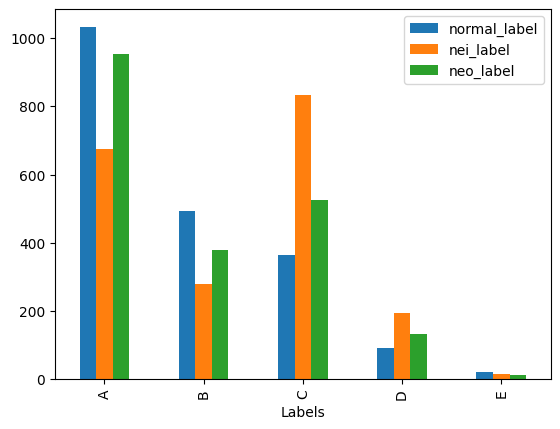

In [59]:
compare = pd.DataFrame(df[NORMAL_LABEL].value_counts())
compare[NEI_LABEL] = df[NEI_LABEL].value_counts()
compare[NEO_LABEL] = df[NEO_LABEL].value_counts()
compare["Labels"] = compare.index

compare.plot(x="Labels", y=[NORMAL_LABEL, NEI_LABEL, NEO_LABEL], kind="bar")

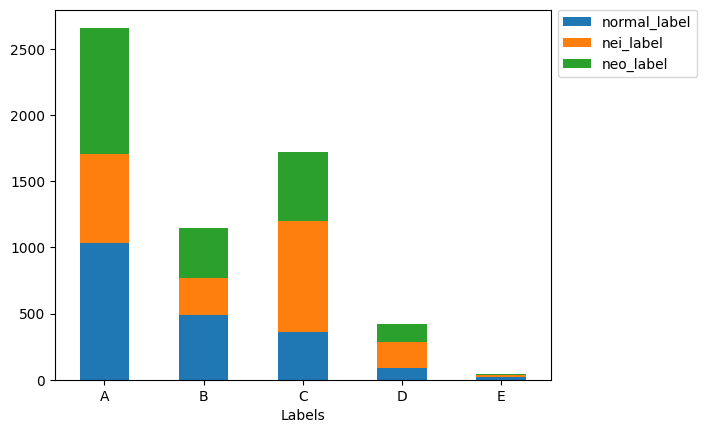

In [60]:
ax = compare.plot(x="Labels", y=[NORMAL_LABEL, NEI_LABEL, NEO_LABEL], kind="bar", rot=0, stacked=True)
_ = ax.legend(bbox_to_anchor=(1, 1.02), loc='upper left')

<AxesSubplot:title={'center':'Percentage of matching classification between the three models'}>

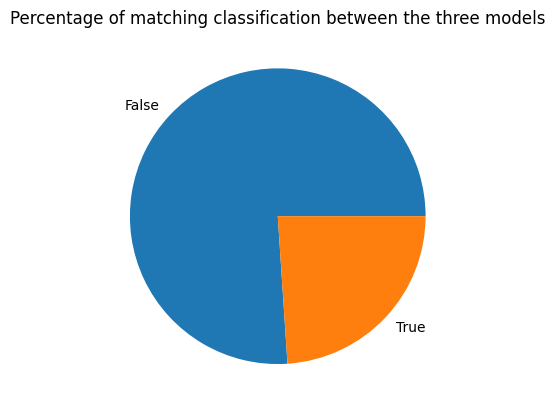

In [66]:
df['all_matching'] = df.apply(lambda x: x[NORMAL_LABEL] == x[NEI_LABEL] == x[NEO_LABEL], axis = 1)
match_compare = df['all_matching'].value_counts()

match_compare.plot.pie(y='all_matching', label="", title="Percentage of matching classification between the three models")